# Churn On Telecom Customer

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Click here for Dataset: https://github.com/ksingh9398/Evaluation-project-Phase/blob/main/Telecom_customer_churn.xls

Question --> 1

The dataset contains the data of the customer. On the basis of the data we have to predict the churn rate by the customer. The dataset contains the data like 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport", StreamingTV', 'StreamingMovies', 'Contract', 'Paperless Billing', PaymentMethod", "MonthlyCharges', 'TotalCharges' and Churn'

Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base, for example in businesses with a subscriber-based service model such as mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks. Churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to measure return on marketing investment using marketing mix modeling.

In [5]:
# Load dataset
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Observations-->

This dataset contains the details of customers in which both numerical and categorical data are present. Here "Churn" is the target variable which contains 2 categories so it will be termed as "Classification problem where we need to predict the several churn using the classification models 

Exploratory\\ Data Analysis(EDA)

In [6]:

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0            1.0              0.0             0.0  ...   
1              1.0            0.0              0.0             2.0  ...   
2              1.0            0.0              0.0             2.0  ...   
3              0.0            1.0              0.0             2.0  ...   
4              1.0            0.0              1.0             0.0  ...   
...            ...            ...              ...             ...  ...   
7038           1.0            2.0              0.0             2.0  ...   
7039           1.0            2.0              1.0             0.0  ...   
7040           0.0            1.0              0.0             2.0  ...   
7041           1.0            2.0              1.0             0.0  ...   
7042           1.0            0.0              1.0             2.0  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85        2505.0    0.0  
1                  0.0            3.0           56.95        1466.0    0.0  
2                  1.0            3.0           53.85         157.0    1.0  
3                  0.0            0.0           42.30        1400.0    0.0  
4                  1.0            2.0           70.70         925.0    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80        1597.0    0.0  
7039               1.0            1.0          103.20        5698.0    0.0  
7040               1.0            2.0           29.60        2994.0    0.0  
7041               1.0            3.0           74.40        2660.0    1.0  
7042               1.0            0.0          105.65        5407.0    0.0  

[7043 rows x 21 columns]

In [7]:
df.shape

(7043, 21)

This Dataset contains 7043 rows and 21 columns. out of which 1 is target variable and another of 20 are independense variable 

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# checking the columns names in this dataset in list format 
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

In [13]:
# full informations 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


as we see that there are no null values are present in this dataset

<Axes: >

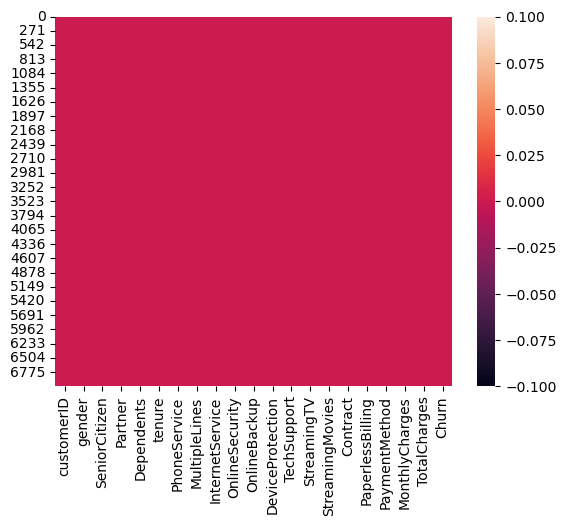

In [14]:
# let visualize it using heatmap
sns.heatmap(df.isnull())

In [15]:
df['TotalCharges'].unique()

array([2505., 1466.,  157., ..., 2994., 2660., 5407.])

In [16]:
df['TotalCharges'].nunique()
# count of total unique values 

6531

In [17]:
# for checking the value cont of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

customerID
5375.0    1
2667.0    1
4267.0    1
4222.0    1
3815.0    1
         ..
6899.0    1
1807.0    1
1063.0    1
3007.0    1
2226.0    1
Name: count, Length: 7043, dtype: int64


gender
1.0    3555
0.0    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
0.0    3641
1.0    3402
Name: count, dtype: int64


Dependents
0.0    4933
1.0    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
1.0    6361
0.0     682
Name: count, dtype: int64


MultipleLines
0.0    3390
2.0    2971
1.0     682
Name: count, dtype: int64


InternetService
1.0    3096
0.0    2421
2.0    1526
Name: count, dtype: int64


OnlineSecurity
0.0    3498
2.0    2019
1.0    1526
Name: count, dtype: int64


OnlineBackup
0.0    3088
2.0    2429
1.0    1526
Name: count, dtype: int64


DeviceProtection
0.0    3095
2.0   

There are the value counts of all columns and we can see blnk in TotalCharges column. Lets check out the unique values of that column..

In [18]:
# checking the unique values of TotalCharges column 
df['TotalCharges'].unique()

array([2505., 1466.,  157., ..., 2994., 2660., 5407.])

In [19]:
df.shape

(7043, 21)

we can notice that "TotalCharges" has continous data but its reflecting as object daatatype. and 11 recodrds of this column has blank data. lets handle this column.

In [20]:
# checking the space in TotalCharges column
df.loc[df["TotalCharges"]==" "]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

By locating the TotalCharges we can find this column has space as values but it waas showing 0 missing values in the column. lets fill this column by some values.

In [21]:
df['TotalCharges']= df['TotalCharges'].replace(".",np.nan)
df['TotalCharges'].value_counts()

TotalCharges
0.0       11
1610.0    11
1489.0     9
1607.0     8
1492.0     8
          ..
5408.0     1
5463.0     1
547.0      1
2797.0     1
5407.0     1
Name: count, Length: 6531, dtype: int64

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


In [24]:
print(df.info)

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0         5375.0     0.0              0      1.0         0.0       1   
1         3962.0     1.0              0      0.0         0.0      34   
2         2564.0     1.0              0      0.0         0.0       2   
3         5535.0     1.0              0      0.0         0.0      45   
4         6511.0     0.0              0      0.0         0.0       2   
...          ...     ...            ...      ...         ...     ...   
7038      4853.0     1.0              0      1.0         1.0      24   
7039      1525.0     0.0              0      1.0         1.0      72   
7040      3367.0     0.0              0      1.0         1.0      11   
7041      5934.0     1.0              1      1.0         0.0       4   
7042      2226.0     1.0              0      0.0         0.0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0              0.0          

In [25]:
df["TotalCharges"]= pd.to_numeric(df["TotalCharges"], errors='coerce')

In [26]:
# converting object datatpye to float datatype
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

now we can see total charges columns has some space values which is replaced by nan values now we will handle the nun values.

In [27]:
df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0      5375.0     0.0              0      1.0         0.0       1   
1      3962.0     1.0              0      0.0         0.0      34   
2      2564.0     1.0              0      0.0         0.0       2   
3      5535.0     1.0              0      0.0         0.0      45   
4      6511.0     0.0              0      0.0         0.0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0           0.0            1.0              0.0             0.0  ...   
1           1.0            0.0              0.0             2.0  ...   
2           1.0            0.0              0.0             2.0  ...   
3           0.0            1.0              0.0             2.0  ...   
4           1.0            0.0              1.0             0.0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   
1               2.0          0.0          0.0              0.0       1.0   
2               0.0          0.0          0.0              0.0       0.0   
3               2.0          2.0          0.0              0.0       1.0   
4               0.0          0.0          0.0              0.0       0.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0               1.0            2.0           29.85        2505.0    0.0  
1               0.0            3.0           56.95        1466.0    0.0  
2               1.0            3.0           53.85         157.0    1.0  
3               0.0            0.0           42.30        1400.0    0.0  
4               1.0            2.0           70.70         925.0    1.0  

[5 rows x 21 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


we have converted the datatype of "TotalCharges" form object to float.

In [29]:
# lets check null values again
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

as we have filled blank spaces with nan values in TotalCharges, its showing 11 null values in that column. Replcing the NAN values using mean method as the data has continous values.

In [30]:
# it's not working
np.mean(df['TotalCharges'])
# mean values is = 2283.3004408418656

3257.7941218230867

In [31]:
df.iloc[488:500,:]

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
488      3118.0     0.0              0      1.0         1.0       0   
489      5936.0     1.0              0      0.0         1.0       1   
490      2484.0     1.0              0      1.0         1.0      63   
491      4822.0     0.0              0      0.0         0.0       2   
492       261.0     0.0              0      1.0         0.0       2   
493      4076.0     1.0              1      1.0         0.0      61   
494      4661.0     1.0              0      0.0         0.0       1   
495      5832.0     1.0              0      0.0         0.0      22   
496      2902.0     1.0              0      1.0         0.0      28   
497       339.0     0.0              0      1.0         0.0      70   
498      4424.0     0.0              1      0.0         0.0       5   
499      5528.0     0.0              0      0.0         0.0      12   

     PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
488           0.0            1.0              0.0             2.0  ...   
489           1.0            2.0              1.0             0.0  ...   
490           1.0            2.0              1.0             0.0  ...   
491           1.0            0.0              0.0             0.0  ...   
492           1.0            0.0              1.0             2.0  ...   
493           1.0            2.0              0.0             0.0  ...   
494           1.0            0.0              2.0             1.0  ...   
495           0.0            1.0              0.0             0.0  ...   
496           1.0            0.0              0.0             2.0  ...   
497           1.0            0.0              2.0             1.0  ...   
498           0.0            1.0              0.0             0.0  ...   
499           1.0            2.0              1.0             2.0  ...   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
488               2.0          2.0          2.0              0.0       2.0   
489               0.0          0.0          0.0              0.0       0.0   
490               2.0          0.0          2.0              2.0       2.0   
491               0.0          0.0          2.0              0.0       0.0   
492               0.0          0.0          0.0              0.0       0.0   
493               0.0          0.0          0.0              2.0       1.0   
494               1.0          1.0          1.0              1.0       0.0   
495               2.0          0.0          0.0              2.0       1.0   
496               0.0          2.0          0.0              0.0       0.0   
497               1.0          1.0          1.0              1.0       2.0   
498               0.0          0.0          0.0              0.0       0.0   
499               2.0          0.0          0.0              2.0       0.0   

     PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
488               1.0            0.0           52.55           0.0    0.0  
489               1.0            2.0           74.35        5718.0    1.0  
490               1.0            0.0          104.80        5265.0    0.0  
491               1.0            2.0           59.00         270.0    0.0  
492               1.0            2.0           74.40         711.0    1.0  
493               0.0            0.0           64.05        3347.0    0.0  
494               0.0            3.0           20.40        1614.0    0.0  
495               1.0            0.0           43.75        6333.0    1.0  
496               0.0            3.0           60.90        1320.0    0.0  
497               0.0            0.0           19.80         725.0    0.0  
498               0.0            2.0           28.45         568.0    1.0  
499               1.0            0.0           99.70         436.0    1.0  

[12 rows x 21 columns]

In [32]:
# np.mean(df['TotalCharges'])

In [33]:
df.iloc[488:500,:]

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
488      3118.0     0.0              0      1.0         1.0       0   
489      5936.0     1.0              0      0.0         1.0       1   
490      2484.0     1.0              0      1.0         1.0      63   
491      4822.0     0.0              0      0.0         0.0       2   
492       261.0     0.0              0      1.0         0.0       2   
493      4076.0     1.0              1      1.0         0.0      61   
494      4661.0     1.0              0      0.0         0.0       1   
495      5832.0     1.0              0      0.0         0.0      22   
496      2902.0     1.0              0      1.0         0.0      28   
497       339.0     0.0              0      1.0         0.0      70   
498      4424.0     0.0              1      0.0         0.0       5   
499      5528.0     0.0              0      0.0         0.0      12   

     PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
488           0.0            1.0              0.0             2.0  ...   
489           1.0            2.0              1.0             0.0  ...   
490           1.0            2.0              1.0             0.0  ...   
491           1.0            0.0              0.0             0.0  ...   
492           1.0            0.0              1.0             2.0  ...   
493           1.0            2.0              0.0             0.0  ...   
494           1.0            0.0              2.0             1.0  ...   
495           0.0            1.0              0.0             0.0  ...   
496           1.0            0.0              0.0             2.0  ...   
497           1.0            0.0              2.0             1.0  ...   
498           0.0            1.0              0.0             0.0  ...   
499           1.0            2.0              1.0             2.0  ...   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
488               2.0          2.0          2.0              0.0       2.0   
489               0.0          0.0          0.0              0.0       0.0   
490               2.0          0.0          2.0              2.0       2.0   
491               0.0          0.0          2.0              0.0       0.0   
492               0.0          0.0          0.0              0.0       0.0   
493               0.0          0.0          0.0              2.0       1.0   
494               1.0          1.0          1.0              1.0       0.0   
495               2.0          0.0          0.0              2.0       1.0   
496               0.0          2.0          0.0              0.0       0.0   
497               1.0          1.0          1.0              1.0       2.0   
498               0.0          0.0          0.0              0.0       0.0   
499               2.0          0.0          0.0              2.0       0.0   

     PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
488               1.0            0.0           52.55           0.0    0.0  
489               1.0            2.0           74.35        5718.0    1.0  
490               1.0            0.0          104.80        5265.0    0.0  
491               1.0            2.0           59.00         270.0    0.0  
492               1.0            2.0           74.40         711.0    1.0  
493               0.0            0.0           64.05        3347.0    0.0  
494               0.0            3.0           20.40        1614.0    0.0  
495               1.0            0.0           43.75        6333.0    1.0  
496               0.0            3.0           60.90        1320.0    0.0  
497               0.0            0.0           19.80         725.0    0.0  
498               0.0            2.0           28.45         568.0    1.0  
499               1.0            0.0           99.70         436.0    1.0  

[12 rows x 21 columns]

In [34]:
# Checking the mean of Total Charges column
print('The mean value of TotalCharges is :',df['TotalCharges'].mean())

The mean value of TotalCharges is : 3257.7941218230867


In [35]:
# Filling null values in TdotalCharges with its mean
df["TotalCharges"]=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

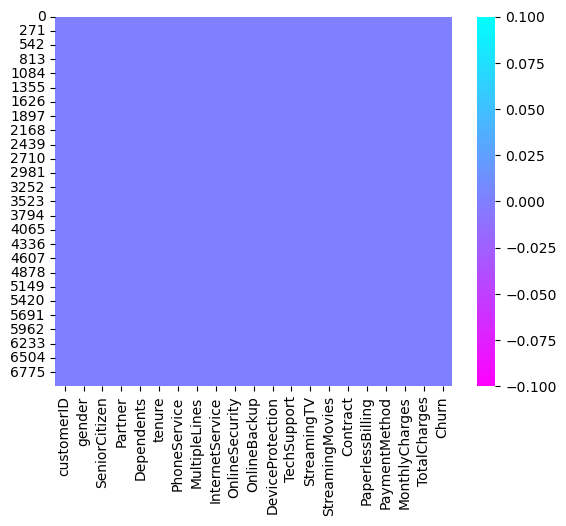

In [37]:
# lets check the null values again
sns.heatmap(df.isnull(),cmap='cool_r')

In [38]:
df.iloc[488,:]

customerID          3118.00
gender                 0.00
SeniorCitizen          0.00
Partner                1.00
Dependents             1.00
tenure                 0.00
PhoneService           0.00
MultipleLines          1.00
InternetService        0.00
OnlineSecurity         2.00
OnlineBackup           0.00
DeviceProtection       2.00
TechSupport            2.00
StreamingTV            2.00
StreamingMovies        0.00
Contract               2.00
PaperlessBilling       1.00
PaymentMethod          0.00
MonthlyCharges        52.55
TotalCharges           0.00
Churn                  0.00
Name: 488, dtype: float64

now we can see there are no missing values in any of the column

In [39]:
# seprating Numericaal and categorical columns

# checking for categorical columns 
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
        
print("Categorical Columns:", categorical_col)
print('\n')


# Checking for Numeircal columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
        
print('Numerical Columns:',numerical_col)

Categorical Columns: []


Numerical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [40]:
# Checking numberof unique values in each column
df.nunique().to_frame('No. of unique values')

No. of unique values
customerID                        7043
gender                               2
SeniorCitizen                        2
Partner                              2
Dependents                           2
tenure                              73
PhoneService                         2
MultipleLines                        3
InternetService                      3
OnlineSecurity                       3
OnlineBackup                         3
DeviceProtection                     3
TechSupport                          3
StreamingTV                          3
StreamingMovies                      3
Contract                             3
PaperlessBilling                     2
PaymentMethod                        4
MonthlyCharges                    1585
TotalCharges                      6531
Churn                                2

these are the unique values present int the dataset. here customeid column has the data or unique id to customer which can be droped 

In [41]:
# droping customerid column
df.drop('customerID',axis=1, inplace=True)

In [42]:
#df=df.drop('customerID',axis=1)

In [43]:
df.head(1)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     0.0              0      1.0         0.0       1           0.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            1.0              0.0             0.0           2.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0               1.0            2.0           29.85        2505.0    0.0

In [44]:
# Checking the list of counts of target
df["Churn"].unique()

array([0., 1.])

In [45]:
# checking the unique values in target column
df['Churn'].value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

we can assume that "NO" stands for the customers who have not churned and "Yes" stands for the customer who have churned for the company

# Description of Dataset

In [46]:
# Statistical Summary of numrical columns 
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.906432          0.904444     0.797104     0.985376   
std        0.880162          0.879949     0.861551     0.885002   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   3257.794122     0.265370  
std         30.090047   1888.693496     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000   1609.000000     0.000000  
50%         70.350000   3249.000000     0.000000  
75%         89.850000   4901.500000     1.000000  
max        118.750000   6530.000000     1.000000

# Observation 
This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/incvalid values 

From the above description we can observe the following:

1) The Counts of all the columns are same which means there are no missing values in the dataset.

2) the mean value is greater then median(50%) in tenure and TotalCharges columns which means the data is skewed to right these column.

3) The data is the column MonthlyCharge have mean values less then median which means the data is skewed to left.

4) By summarizing the data we can observe there is a huge difference between 75% and max hence there are outliers present int he data.

5) We can also notice the Standard deviation, min, 25% percentile valuese from this describe method.

#  Data Visualization 
Univariate Analysis

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64


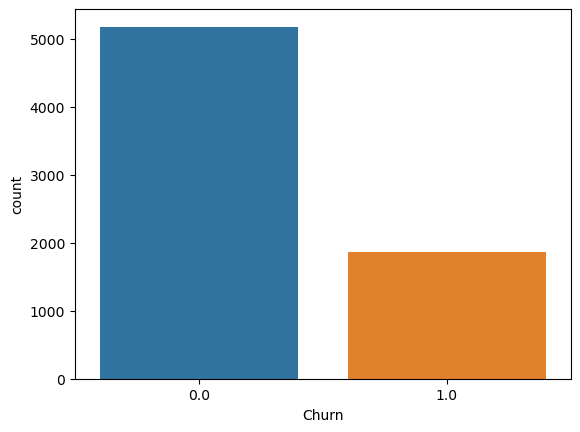

In [47]:
# Visulize the number of Churned customers
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

we can observe that the count of " No churn" are high compared to the count of "Yes Churn" i.e there are more number of customers who have not churned. this leads to class imbalance issue in the data. we will rectify it by using oversampling method in later part.  

gender
1.0    3555
0.0    3488
Name: count, dtype: int64


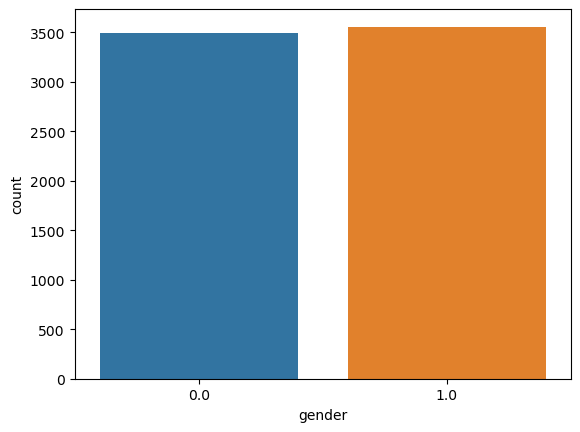

In [48]:
# Visulizing the count of Gender
print(df['gender'].value_counts())
ax=sns.countplot(x='gender',data=df)
plt.show()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


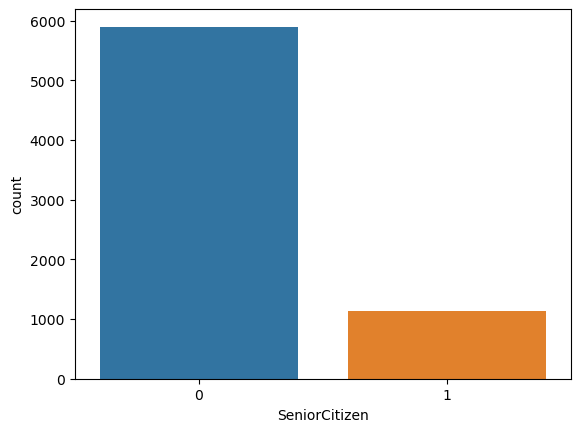

In [49]:
# visualizing the count of Senior  Citizen 
print(df['SeniorCitizen'].value_counts())
ax=sns.countplot(x='SeniorCitizen',data=df)
plt.show()

Here 0 represents non senior citizens and 1 represent senior citizens. The count of 0 is high compread to 1 which means the number of non senior citizens are quite high compared to senior citizens data in the dataset.

Partner
0.0    3641
1.0    3402
Name: count, dtype: int64


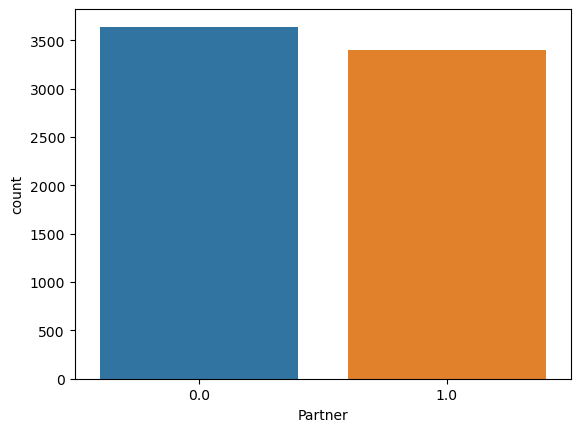

In [50]:
# Visulizing the count of Partner 
print(df['Partner'].value_counts())
ax=sns.countplot(x='Partner',data=df)
plt.show()

non patners are bit high in count of customer having partners.

Dependents
0.0    4933
1.0    2110
Name: count, dtype: int64


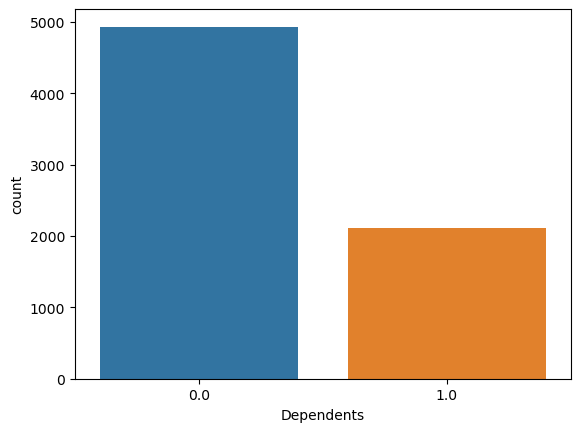

In [51]:
# visualizing the count of Dependents
print(df['Dependents'].value_counts())
ax=sns.countplot(x='Dependents',data=df)
plt.show()

PhoneService
1.0    6361
0.0     682
Name: count, dtype: int64


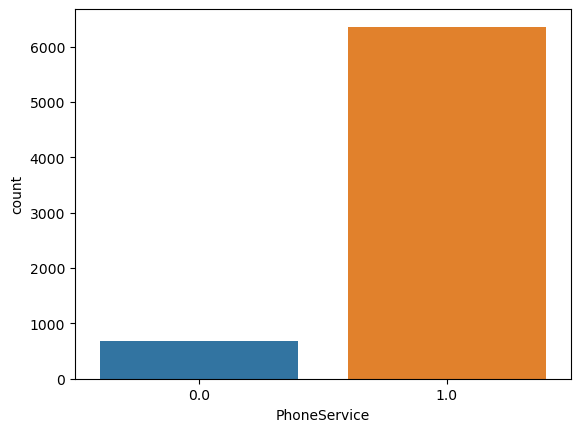

In [52]:
# visualizing the count of PhoneService
print(df['PhoneService'].value_counts())
ax=sns.countplot(x='PhoneService',data=df)
plt.show()

The customers whoe have phone service are large in numbers and who do not own phone service are very less number

MultipleLines
0.0    3390
2.0    2971
1.0     682
Name: count, dtype: int64


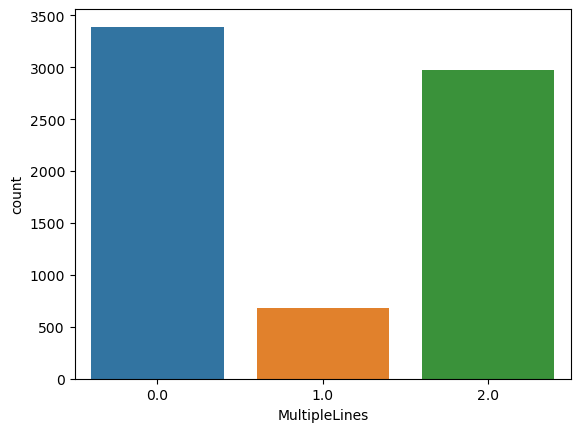

In [53]:
# visualizing the count of MultipleLines
print(df['MultipleLines'].value_counts())
ax=sns.countplot(x='MultipleLines',data=df)
plt.show()

The coutomers having phoneservices from single line have high counts compared to the customer phone services from multiple line, also the customers who do not have phone services have covered very less data compared to others

OnlineSecurity
0.0    3498
2.0    2019
1.0    1526
Name: count, dtype: int64


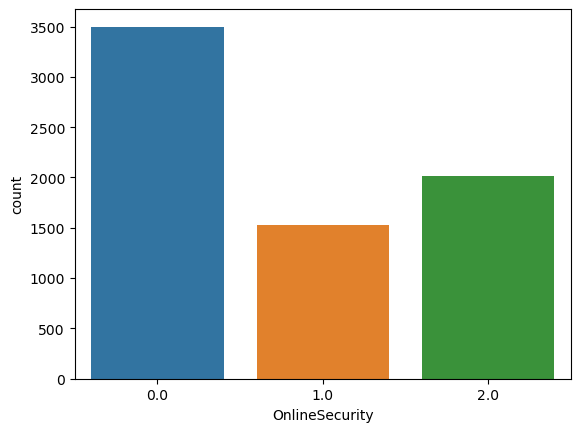

In [54]:
# visualizing the count of OnlineSecurity
print(df['OnlineSecurity'].value_counts())
ax=sns.countplot(x='OnlineSecurity',data=df)
plt.show()

The customer having NotInternetServices needs online security and who do not own any internet services, they do not need online Security, But from the plot we can observe the majority of customers who have internet services have low online security 

OnlineBackup
0.0    3088
2.0    2429
1.0    1526
Name: count, dtype: int64


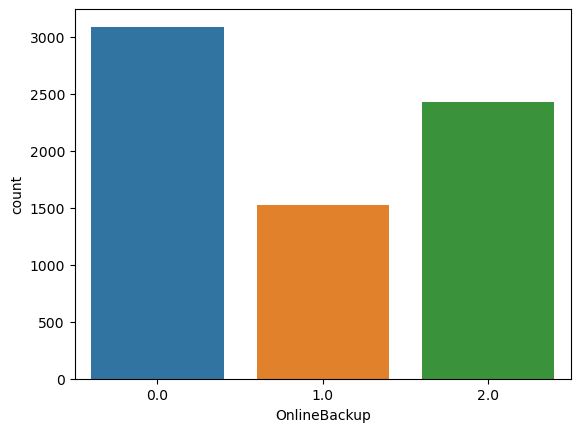

In [55]:
# visualizing the count of OnlineBackup
print(df['OnlineBackup'].value_counts())
ax=sns.countplot(x='OnlineBackup',data=df)
plt.show()

we can observe thet the customers having no internet services have very less online backup counts campread to others

DeviceProtection
0.0    3095
2.0    2422
1.0    1526
Name: count, dtype: int64


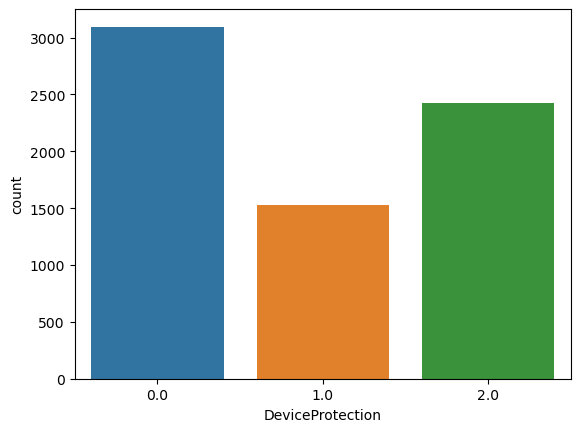

In [56]:
# visualizing the count of DeviceProtection
print(df['DeviceProtection'].value_counts())
ax=sns.countplot(x='DeviceProtection',data=df)
plt.show()

we can see that the customers who do not have internet access, they don't need any Device Protection 

TechSupport
0.0    3473
2.0    2044
1.0    1526
Name: count, dtype: int64


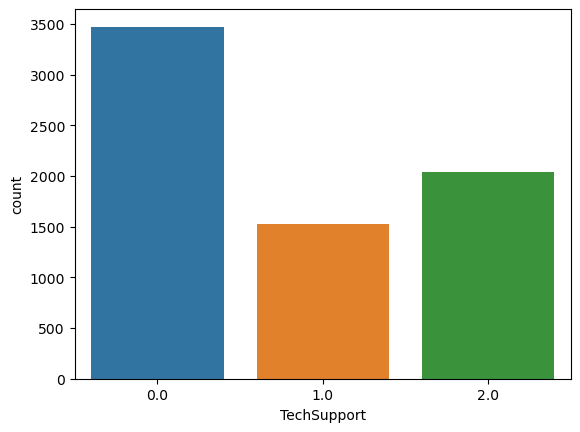

In [57]:
# visualizing the count of TechSupport
print(df['TechSupport'].value_counts())
ax=sns.countplot(x='TechSupport',data=df)
plt.show()

The customers who do not need any technical support are high in counts compared to the customer who need the technical suports

StreamingTV
0.0    2810
2.0    2707
1.0    1526
Name: count, dtype: int64


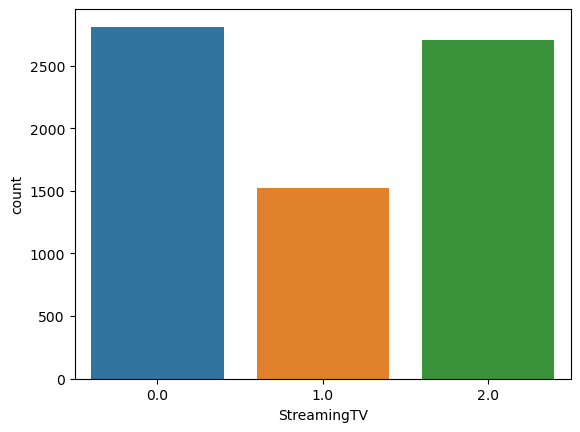

In [58]:
# visualizing how many customer have streamingTV
print(df['StreamingTV'].value_counts())
ax=sns.countplot(x='StreamingTV',data=df)
plt.show()

The customers who do not use streaming TV are little bit high in numbers then the customers who do use Streming TV, and the customer who do not own internet they do not have this service much. 

StreamingMovies
0.0    2785
2.0    2732
1.0    1526
Name: count, dtype: int64


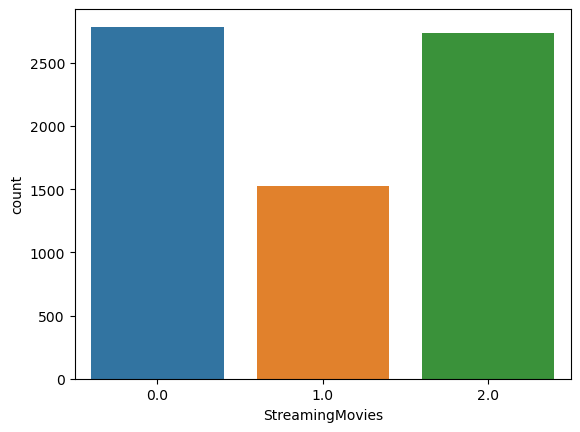

In [59]:
# visualizing how many customer have StreamingMovies
print(df['StreamingMovies'].value_counts())
ax=sns.countplot(x='StreamingMovies',data=df)
plt.show()

The customers who do not have streming movies are high in count follwed by the customer who have streming movies services, and the customers who do not have internet services, they have less streming movies services compared to others

PaperlessBilling
1.0    4171
0.0    2872
Name: count, dtype: int64


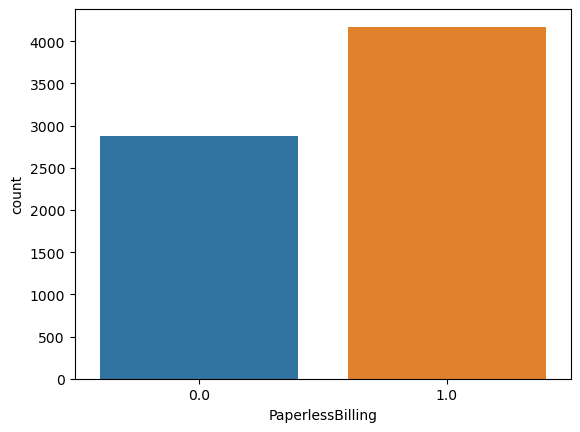

In [60]:
# visualizing how many customer have PaymentMethod
print(df['PaperlessBilling'].value_counts())
ax=sns.countplot(x='PaperlessBilling',data=df)
plt.show()

Most of the customers prefer paper billing and average number of customers who do not prefer paperless billing they may like to recive paper billing.

PaymentMethod
2.0    2365
3.0    1612
0.0    1544
1.0    1522
Name: count, dtype: int64


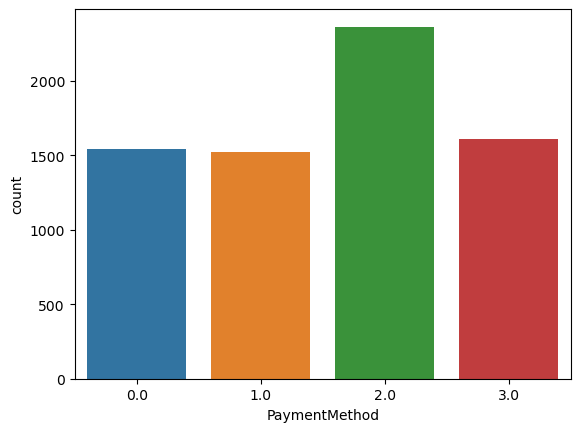

In [61]:
# visualizing how many customer have PaymentMethod
print(df['PaymentMethod'].value_counts())
ax=sns.countplot(x='PaymentMethod',data=df)
plt.show()

Most of the customers prefer Electronic check payment method and the customers who prefer mailed Check, Bank transfer and credit card have average in count. 

In [62]:
numerical_col

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [63]:
# df[col].info

In [64]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     0.0              0      1.0         0.0       1           0.0   
1     1.0              0      0.0         0.0      34           1.0   
2     1.0              0      0.0         0.0       2           1.0   
3     1.0              0      0.0         0.0      45           0.0   
4     0.0              0      0.0         0.0       2           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            1.0              0.0             0.0           2.0   
1            0.0              0.0             2.0           0.0   
2            0.0              0.0             2.0           2.0   
3            1.0              0.0             2.0           0.0   
4            0.0              1.0             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   
1               2.0          0.0          0.0              0.0       1.0   
2               0.0          0.0          0.0              0.0       0.0   
3               2.0          2.0          0.0              0.0       1.0   
4               0.0          0.0          0.0              0.0       0.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0               1.0            2.0           29.85        2505.0    0.0  
1               0.0            3.0           56.95        1466.0    0.0  
2               1.0            3.0           53.85         157.0    1.0  
3               0.0            0.0           42.30        1400.0    0.0  
4               1.0            2.0           70.70         925.0    1.0

From the above distrivution plots we can notice that the data almost looks normal in all the column expect SiniorSitizen, and the data in the column TotalCharges is skewed to the right. other two columns tenure and MonthlyCharges do not have skewness .


# Bivariate Analysis

<Axes: title={'center': 'Comparison between tenure and SeniorCitizen'}, xlabel='SeniorCitizen', ylabel='tenure'>

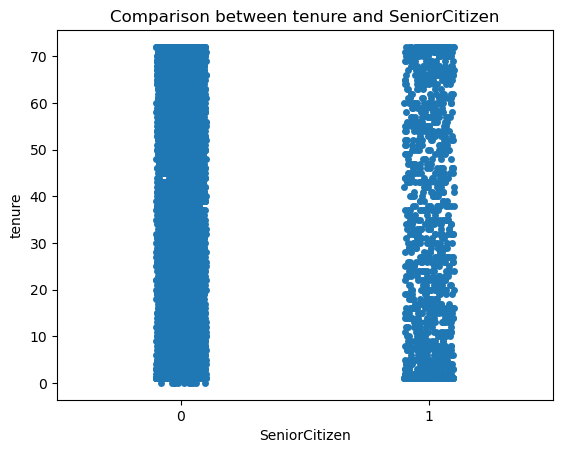

In [66]:
# comparing tenure and SeniorCitizen
plt.title('Comparison between tenure and SeniorCitizen')
sns.stripplot(x='SeniorCitizen',y='tenure',data=df)

There is no lsignificant between the features, here both the freatures are in equal length.

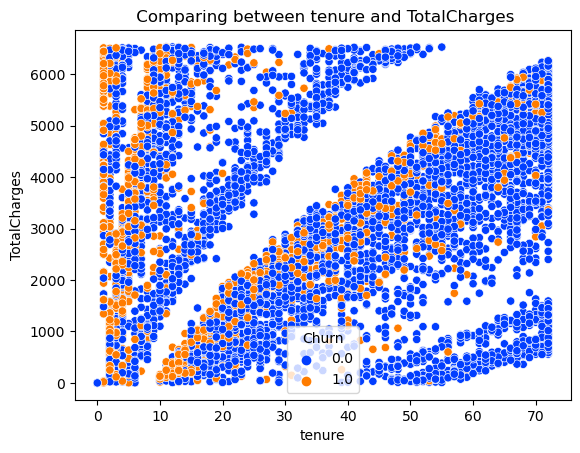

In [67]:
# Comparing tenure and TotaljCharges 

plt.title(" Comparing between tenure and TotalCharges")
sns.scatterplot(x='tenure',y='TotalCharges',data=df, hue= 'Churn', palette='bright')
plt.show()

here we notice the strong linear relation between the features. 

as the tenure increases, TotalCharges also increases repidly. if the customers have low tenure services than there is high chance to churn

<Axes: title={'center': 'Comparison between churn and gender'}, xlabel='gender', ylabel='SeniorCitizen'>

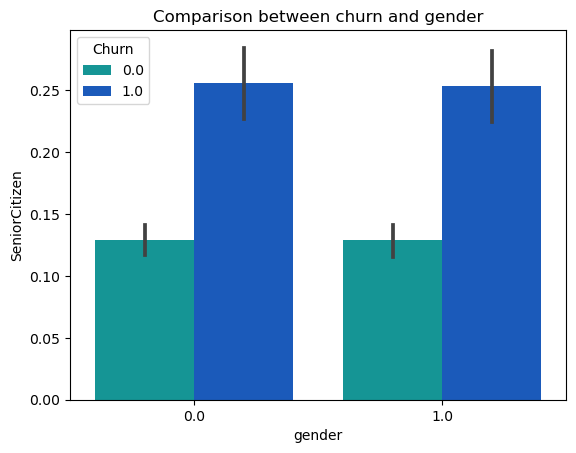

In [68]:
# Comparing gender and SeniorCitizen on the basis of Churn
plt.title('Comparison between churn and gender')
sns.barplot(x='gender',y='SeniorCitizen', data = df, palette= 'winter_r',hue = 'Churn' )

There is no significant diffrence between the columns. The customers churns remains unafuected in gender and seniorCitizen Cases.

to know about any features
https://seaborn.pydata.org/generated/seaborn.barplot.html 

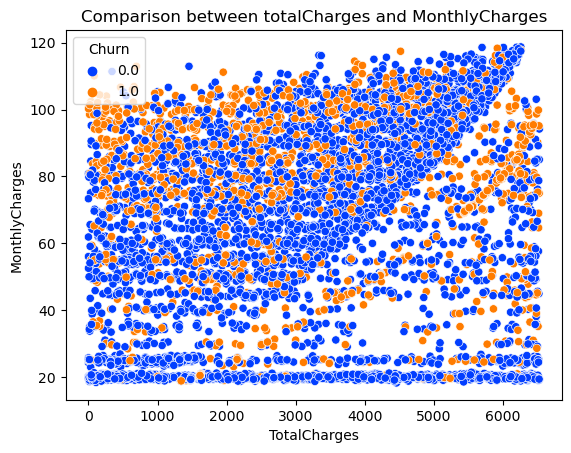

In [69]:
# Comapring TotoalCharges and MonthlyCharges
plt.title('Comparison between totalCharges and MonthlyCharges')
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df, hue='Churn',palette='bright')
plt.show()

There is a linear relationship between the features. The customer with high monthly charges have high tendencey to stop the sinces they have high total charges. 

Also if the customers ready to contribute with the monthly charges then there is an increment in the total charges. 

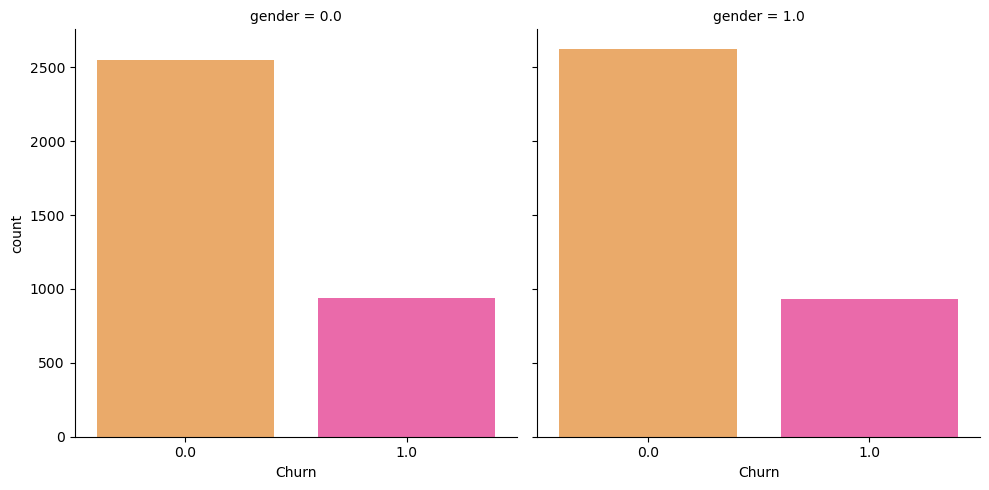

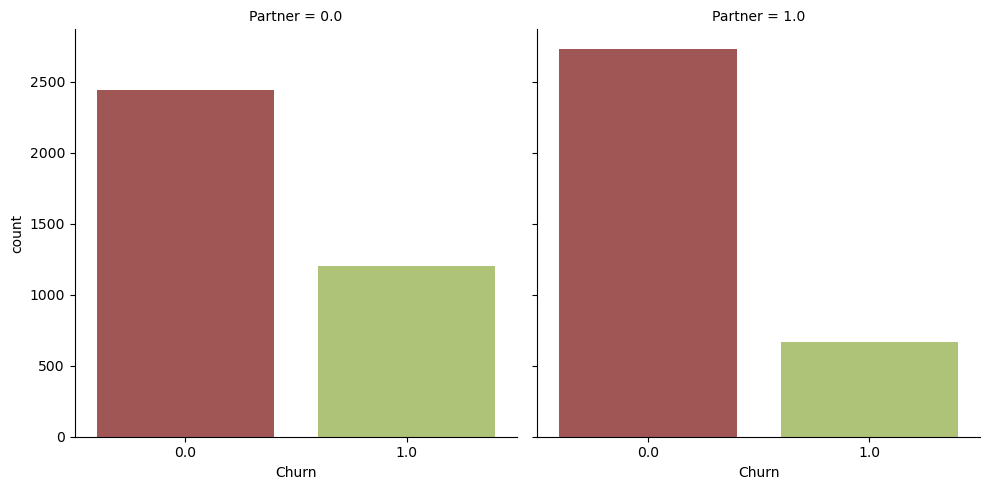

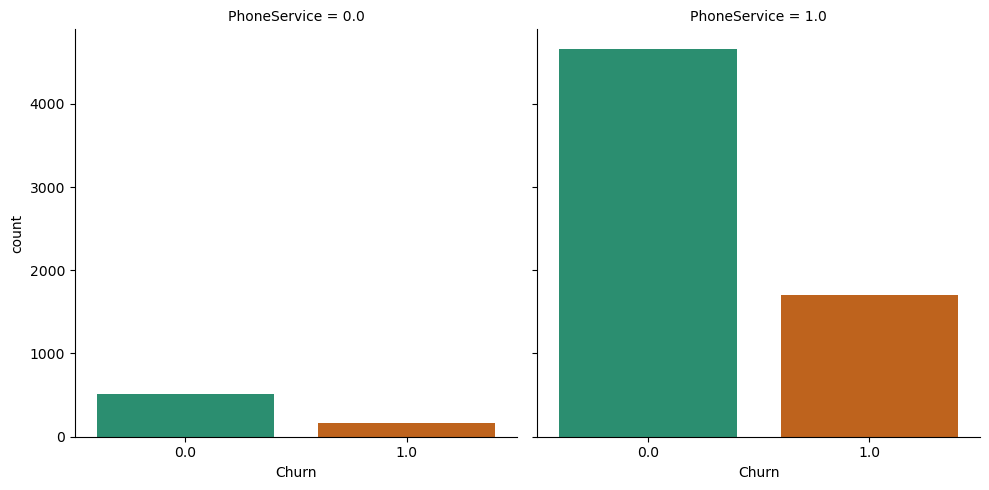

In [70]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind='count',palette='spring_r')

# Checking churn level and partner
sns.catplot(x='Churn',col='Partner',data=df,palette='tab20b_r',kind='count')

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='PhoneService',data=df, palette='Dark2',kind='count')
plt.show()

1) In the first plot we can see there is no significant difference in the genders, both the genders have equal churn level.

2) In the second plot we can see the customers, without partners have high churn rate compared to the customeres with partners

3) The customeres who do not have any dependency have high churn rate compared to the customers who have dependents.

4) In the last plot we can notice the customers who have phone service have high tendency of getting churned. 

5) Note- Here you have to plot more and more Bargraph to batter understood and analysis

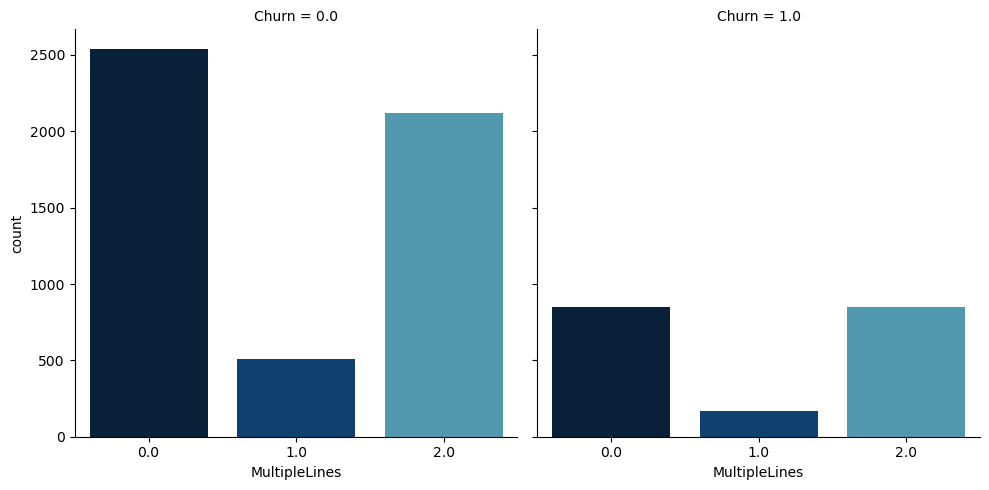

In [71]:
# Checking Churn level and MultipleLines
sns.catplot(x='MultipleLines', col='Churn', palette= 'ocean',kind='count',data=df)
plt.show()

The customers who have phone services from single line have high churn rate comprated to the customers having phone services from multiple line, also there are very less number of customers who do not have phone services. 

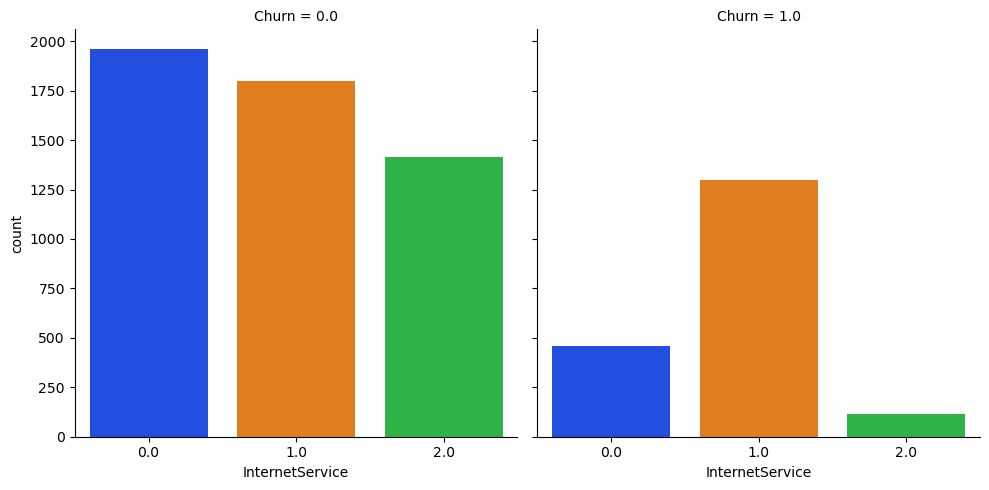

In [72]:
# Checking Churn level in InternetService 
sns.catplot(x='InternetService',col='Churn',palette='bright',kind='count',data=df)
plt.show()

The ration of churn is high when the customers prefer Fiber optic internet services compared to others services, may be this type of services is bad and need to be foucsed on. And the customers who own DSL service they have very less churn rate. 

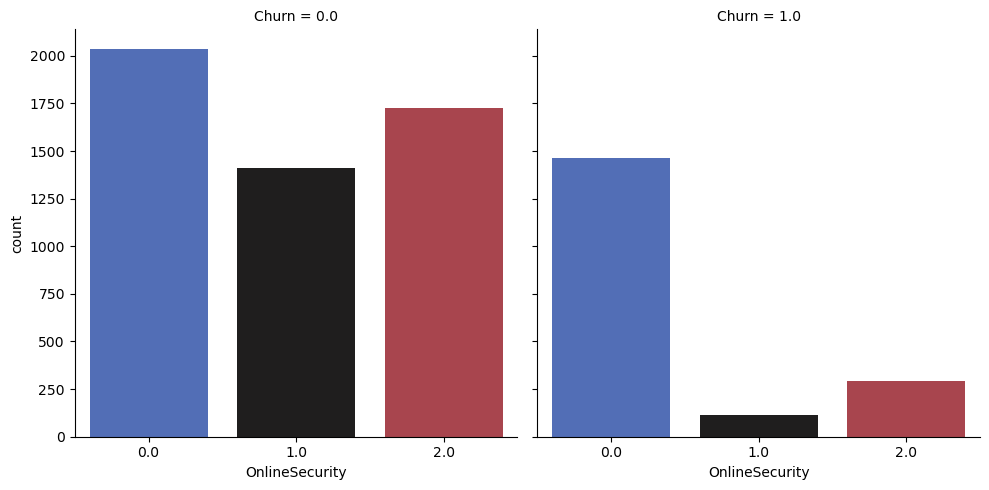

In [73]:
# Checking Churn level in OnlinceSecurity 
sns.catplot(x='OnlineSecurity',col='Churn',palette='icefire',kind='count',data=df)
plt.show()

The Customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency of getting 

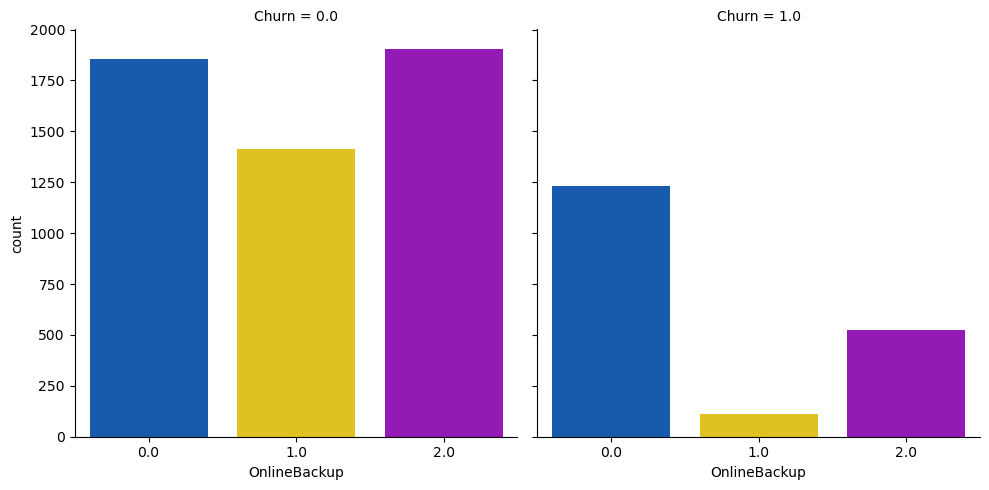

In [74]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette='prism',kind ='count',data=df)
plt.show()

It is also same as in the case of online security. it is obvious that the customers, who do not have internet service they do not need any online backup. The customers who do not have online backup services they have high churn rate.

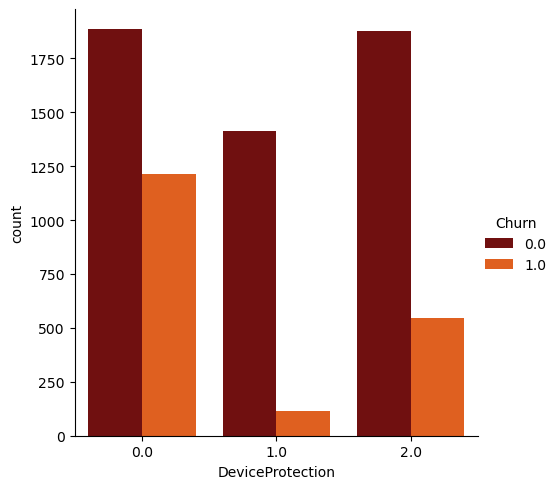

In [75]:
# Checking Churn level in DeviceProtecion 
sns.catplot(x='DeviceProtection',hue= 'Churn', palette='gist_heat',kind='count',data=df)
plt.show()

The Customers who do not own any Device protection have very high churn rate comared to others. 

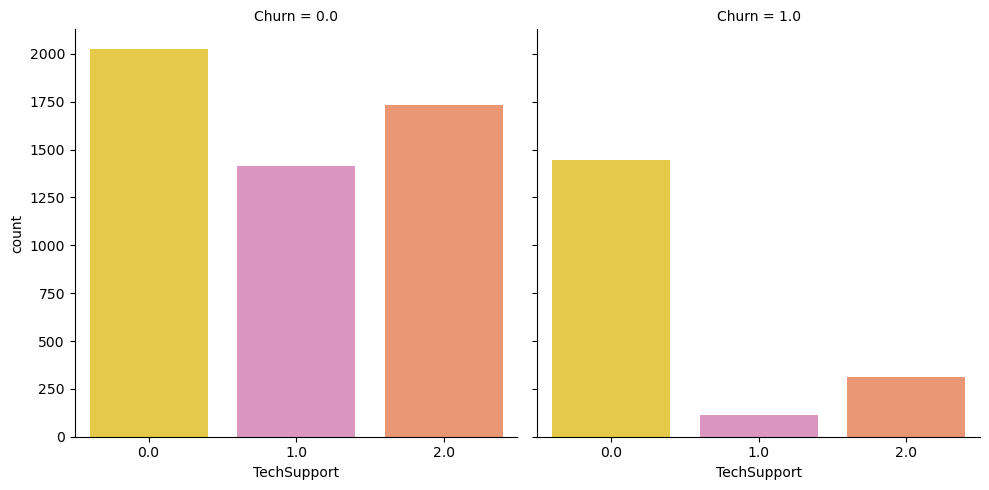

In [76]:
# Checking Chrun level in TechSuport 
sns.catplot(x='TechSupport', col='Churn',palette='Set2_r',kind='count',data=df)
plt.show()

Here we can cleary see that the customers who do not have any techsupport then they have high churn ratio.

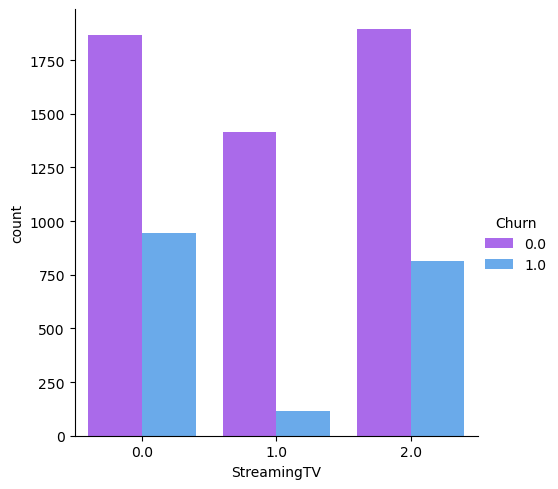

In [77]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV',hue='Churn',palette='cool_r',kind='count',data=df)
plt.show()

The churn rate is nearly same if the customer own StreamingTV or Not.

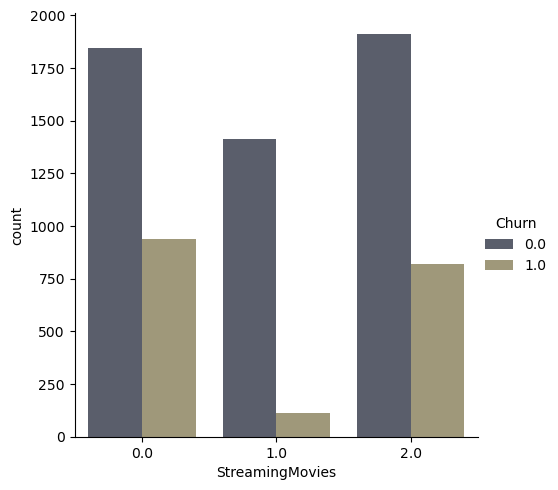

In [78]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette='cividis',kind='count',data=df)
plt.show()

The customers who are exiting in the company they do not own StreamingMovies in their devices, and the churn rate is low when the customers do not have internet services.


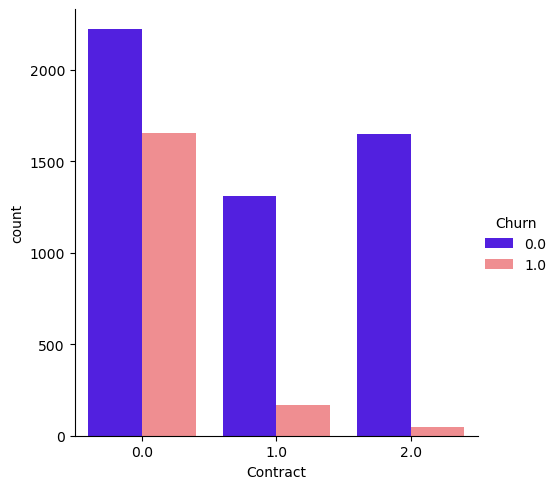

In [79]:
# Checking Churn level in contract
sns.catplot(x='Contract',hue='Churn',palette='gnuplot2',kind='count',data=df)
plt.show()

The customers who have churned are mostly having months to month contract.

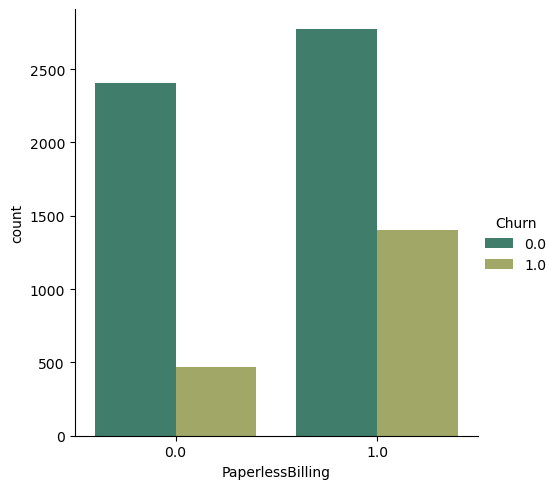

In [80]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette='gist_earth',kind='count',data=df)

The customer who are existing int the company they do not own StreamingMovies in their devices, and them churn rate is low when the customers do not have internet services. 

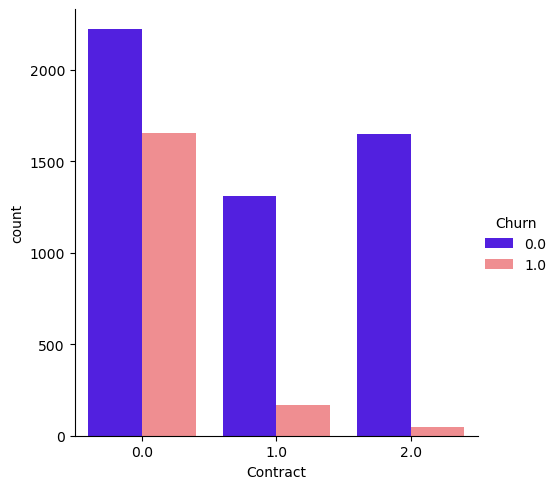

In [81]:
# Checking Churn level in contract
sns.catplot(x='Contract',hue='Churn',palette='gnuplot2',kind='count',data=df)
plt.show()

The customer who have churned are mostly having month to month contract.

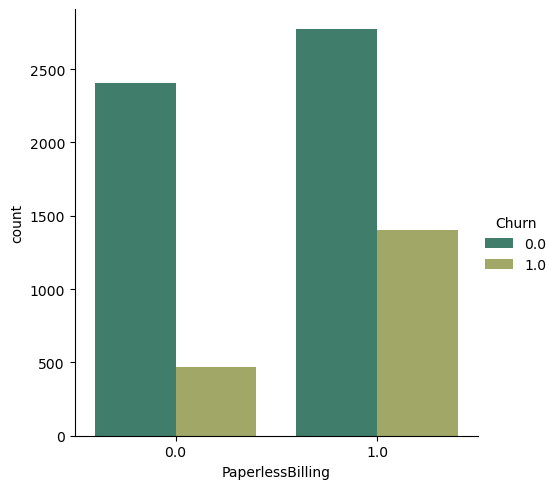

In [82]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette='gist_earth',kind='count',data=df)
plt.show()

the customer who prefer paperless billinhg thye have high churn rate.

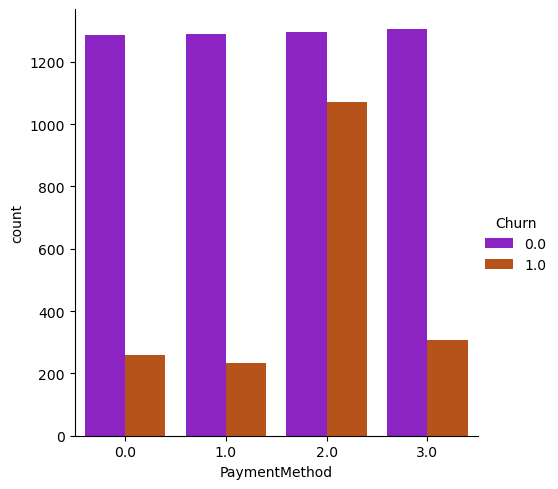

In [83]:
# Checking churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette='gnuplot',kind='count',data=df)
plt.show()

The customers who prefer Electronic check have high churn rate also the customers who exist in the company used equal payment method

# Multivariate Analysis

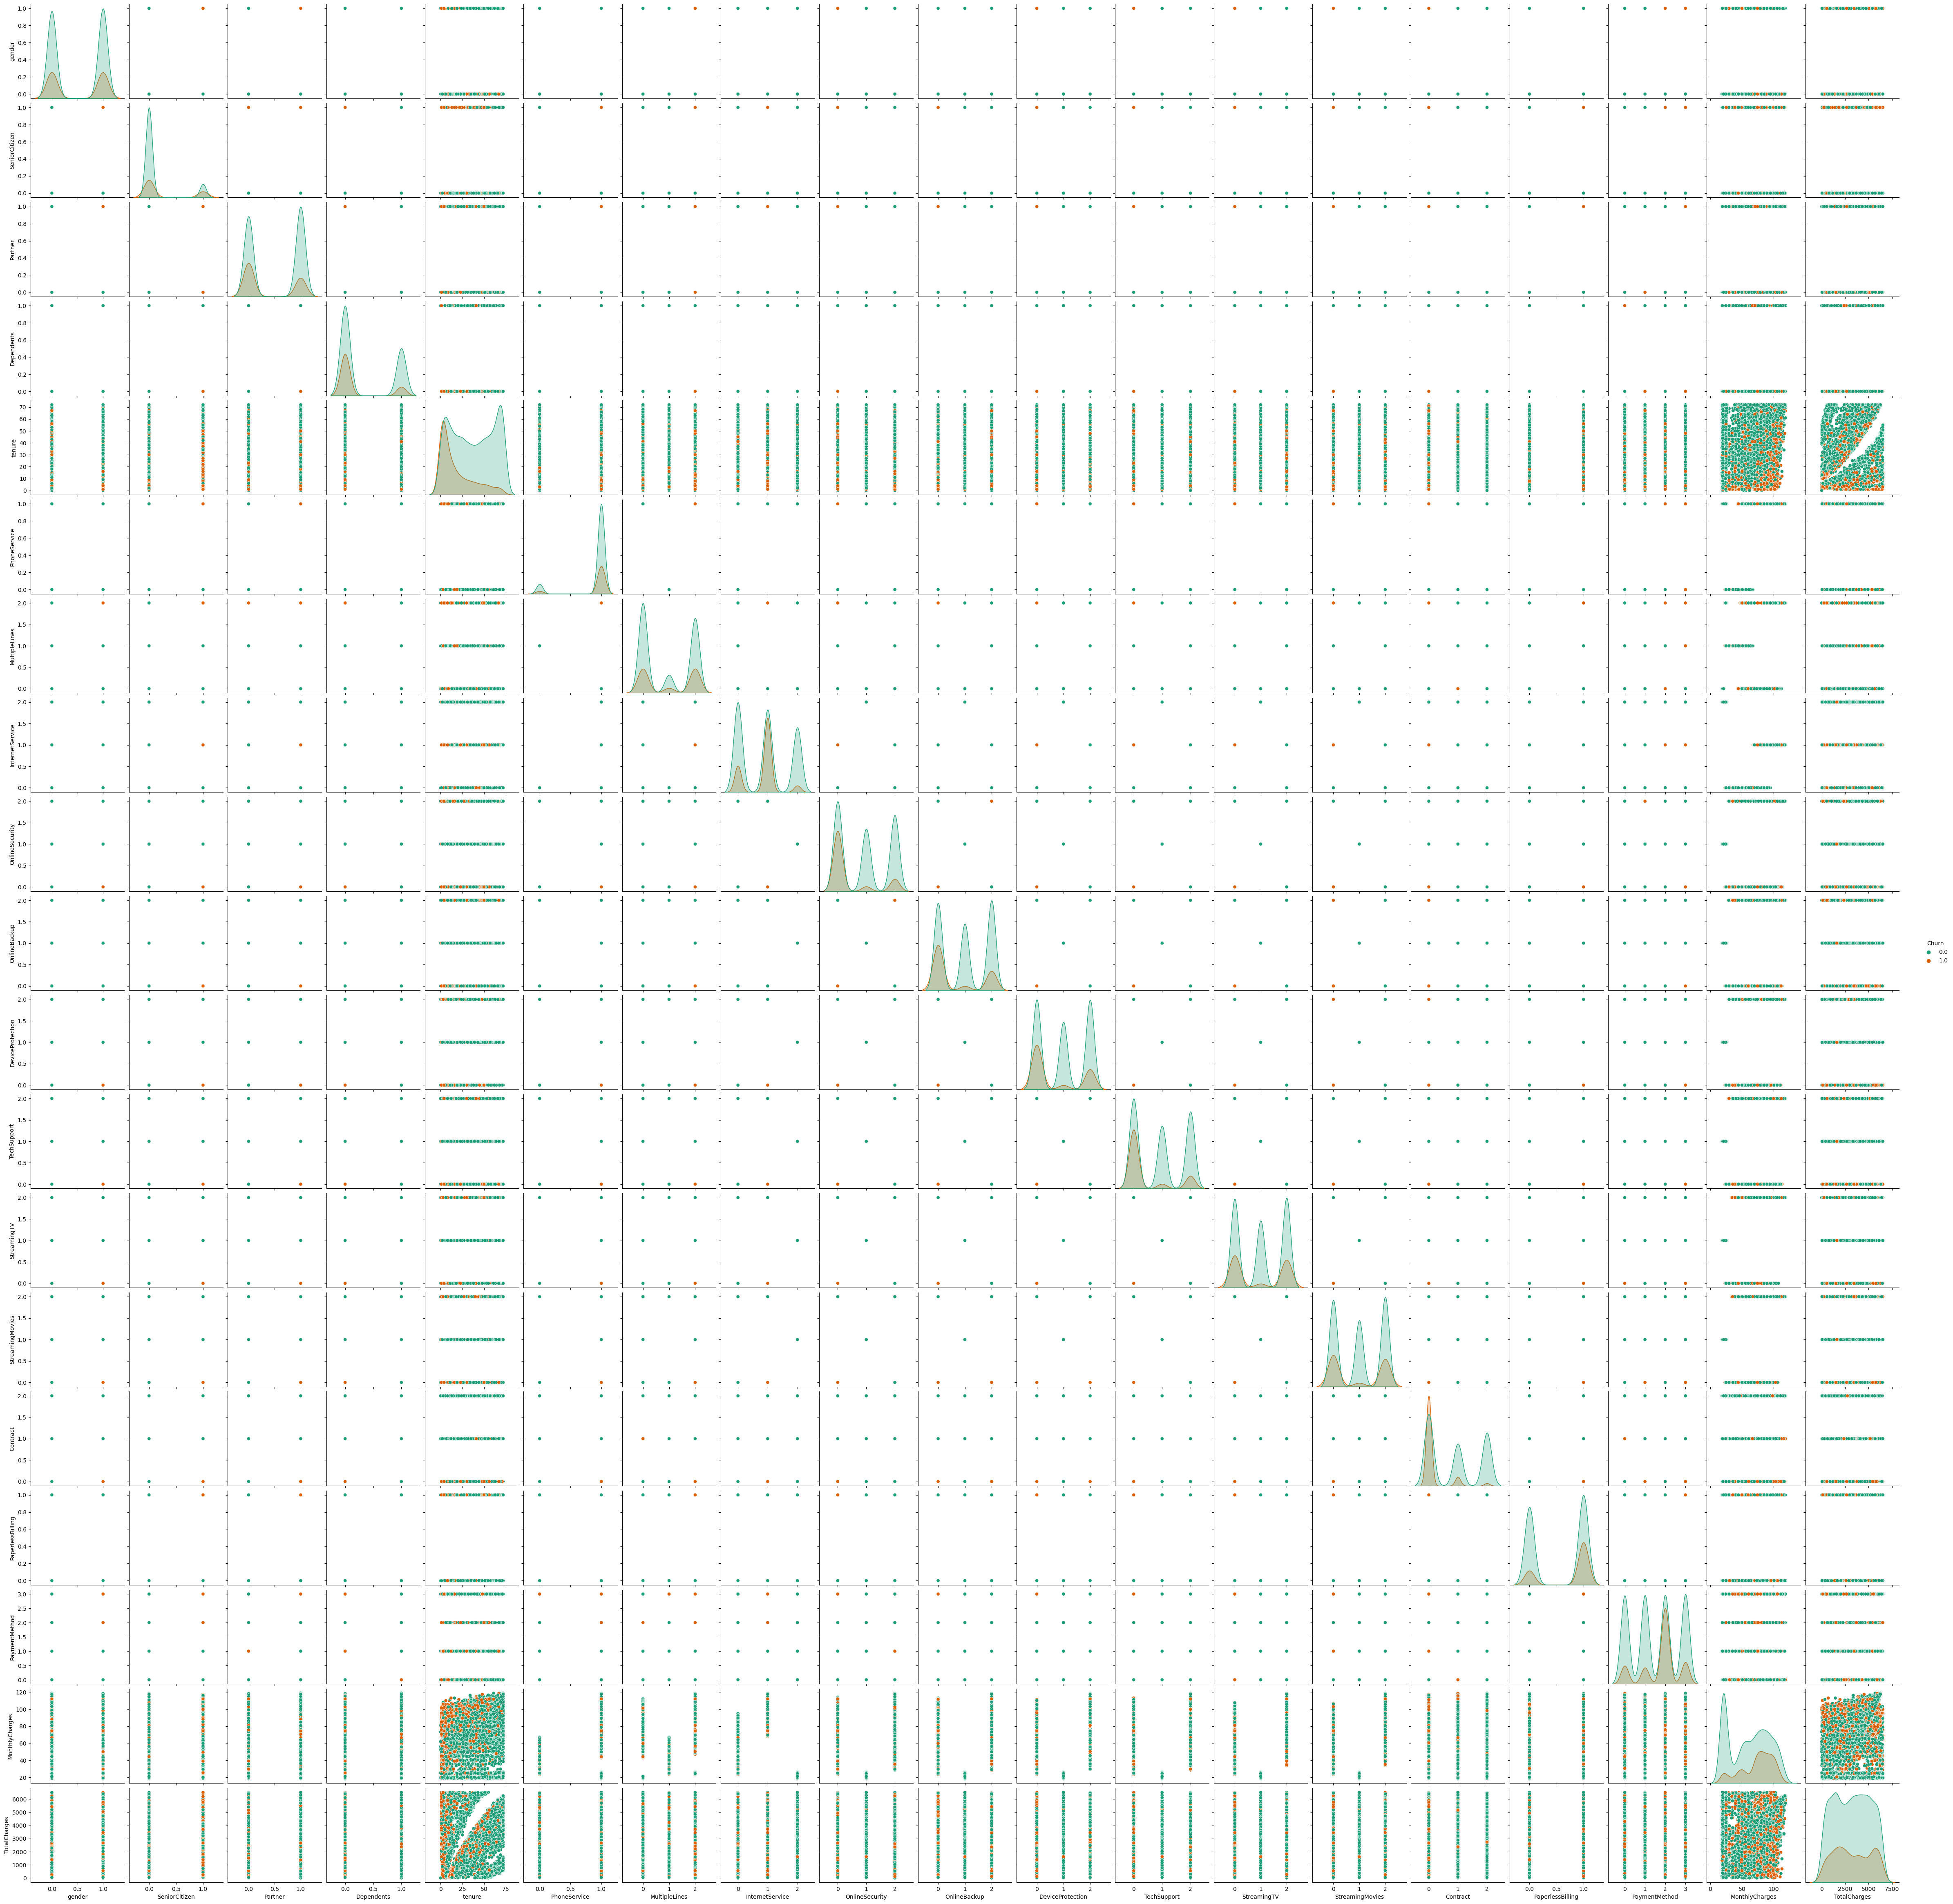

In [84]:
sns.pairplot(df,hue='Churn', palette='Dark2')
plt.show()

1) The pairplot gives the pairwise relation between the feartures on the basis of the target 'Churn', on dignorl we can notice the distribution plot
2) The freatures tenure and TotalCarges, Montlycharges and TotalCharges have strong linear relation with each others.
3) There are no outliers in any of the columns but  let's plot box plot to identify the outliers.

# Checking for Outliers

<Axes: >

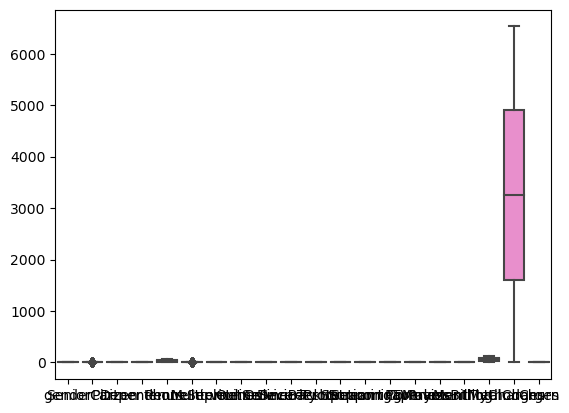

In [86]:
sns.boxplot(df)

The column of senior citizen has outliers but it contains categorical data so no need to remove outliers. apart from this none of the coulumns have outliers. 

# Checking for skewness

In [87]:
df.skew

<bound method DataFrame.skew of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0        

df.skew()
1) SeniorCitizen     1.833633
2) tenure            0.239540
3) MonthlyCharges   -0.220524
4) TotalCharges      0.962394
   dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since Senirocitizen in categorical, no need to remove to skewness  since TotalCharges is countinouse in natures, lets cube root method to remove skewness. 

# Removing skewness

In [88]:
# Removing skewness using cuberoot method
df['TotalCharges']=np.cbrt(df['TotalCharges'])

We have removed the skewness using cube root method.

In [89]:
print(df.skew)
# SeniorCitizen    1.833633
# tenure           0.239540
# MonthlyCharges   -0.220524
# TotalCharges     0.011168

<bound method DataFrame.skew of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0        

we can see the skewness has been reduced in TotalCharges column. 

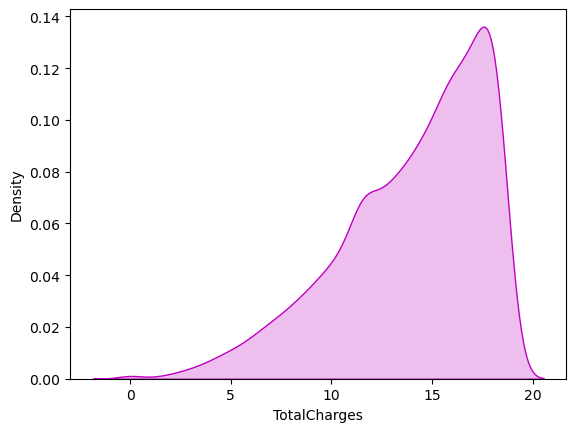

In [90]:
# lets visulize how the data has been distributed in TotalCharges after removing skewness
sns.distplot(df['TotalCharges'], color='m',kde_kws={'shade':True}, hist=False)
plt.show()

This looks almost normal and skewness is also removed

# Encoding categorical columns

In [91]:
import sklearn

In [92]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               1.0              0.0             0.0           2.0   
1               0.0              0.0             2.0           0.0   
2               0.0              0.0             2.0           2.0   
3               1.0              0.0             2.0           0.0   
4               0.0              1.0             0.0           0.0   
...             ...              ...             ...           ...   
7038            2.0              0.0             2.0           0.0   
7039            2.0              1.0             0.0           2.0   
7040            1.0              0.0             2.0           0.0   
7041            2.0              1.0             0.0           0.0   
7042            0.0              1.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85     13.581130    0.0  
1                  0.0            3.0           56.95     11.359991    0.0  
2                  1.0            3.0           53.85      5.394691    1.0  
3                  0.0            0.0           42.30     11.186889    0.0  
4                  1.0            2.0           70.70      9.743476    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80     11.688756    0.0  
7039               1.0            1.0          103.20     17.861070    0.0  
7040               1.0            2.0           29.60     14.412874    0.0  
7041               1.0            3.0           74.40     13.855660    1.0  
7042               1.0            0.0          105.65     17.551684    0.0  

[7043 rows x 20 columns]

In [93]:
print(df.info)

<bound method DataFrame.info of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0        

we have converted the categorical column into numerical columns usning ordinal Encoding method. 

In [94]:
# Statistical sumary of nurerical
df.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.906432          0.904444     0.797104     0.985376   
std        0.880162          0.879949     0.861551     0.885002   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692     14.001431     0.265370  
std         30.090047      3.636595     0.441561  
min         18.250000      0.000000     0.000000  
25%         35.500000     11.717960     0.000000  
50%         70.350000     14.810961     0.000000  
75%         89.850000     16.986725     1.000000  
max        118.750000     18.691223     1.000000

after encording the categorical columns we can see all colun details here. the counts of all the columns are same that mens no null values in the datase4t. This describe method describe the count  mean, std, min, IQR, Max_values of all the columns 

# Correlation between target variable and independent variables.

In [95]:
# Checking the correlation between features and the target.
cor=df.corr()
cor

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges     -0.002271       0.044345  0.057204   -0.023310  0.156680   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.247398       0.433576        -0.323260   
TotalCharges          0.068099       0.118515        -0.095742   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

This gives the correlation between the dependent and independent variables. we can visualize this by plotting heatmap.

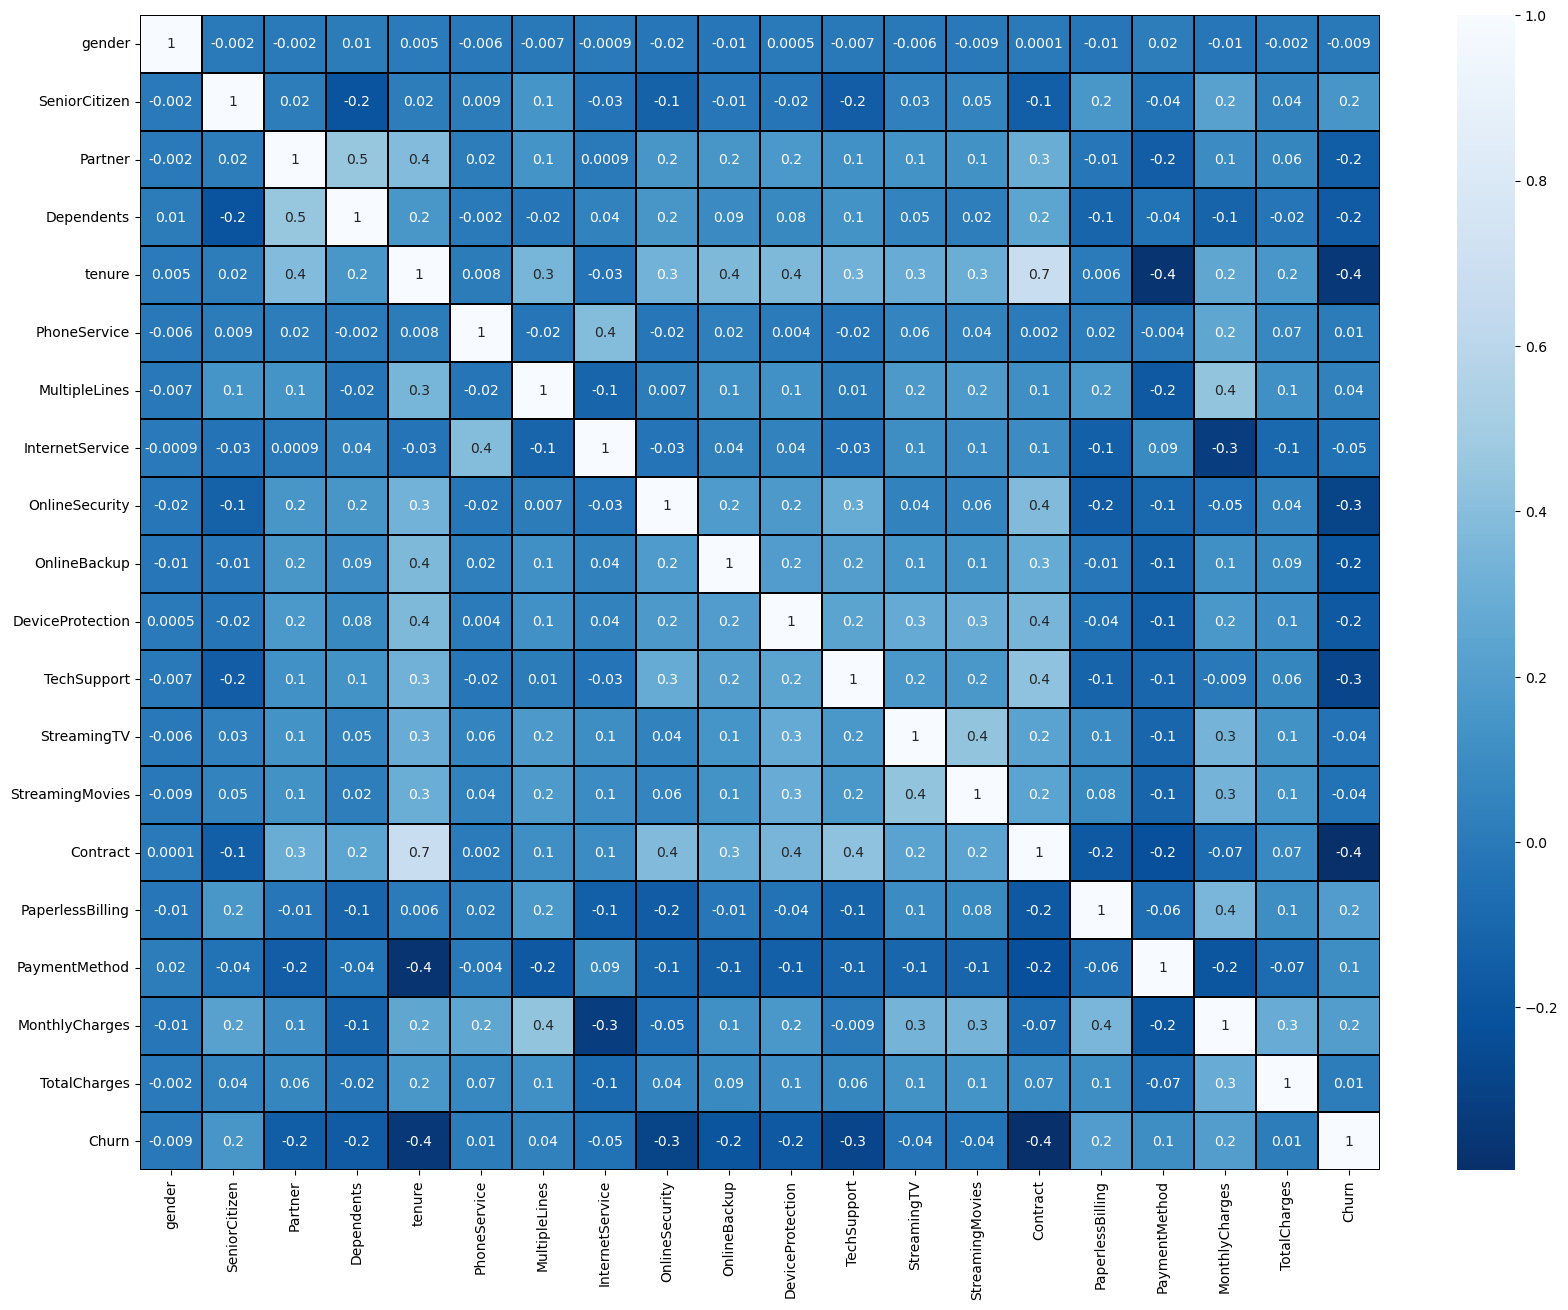

In [96]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',cmap='Blues_r',annot=True)
plt.yticks(rotation=0);
plt.show()

0-> no relation, -0.3 to +0.3-> less correlation, greater then -0.5 or greater then 0+.5-> moderate correlation, grater then -0.7 or greater then +0.7 high correlation 

This heatmap show the correlation matrix by visulaizing the data. we can observe the relation between feature to feature and feature  to label. 
This heatmap contains both positive and negative correlation
1) There is no much positive correlation between the target and features.
2) The column MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the Label Column 'Churn'.
3) The label is negatively correlated with Contract, Tenure, OnlineSecurity, TechSuport, TotalCharges, DeviceProtection, OnlneBackup, Partner and Dependents.
4) Also the column geender has very correlation with the label, we can drop it if necessary.
5) The colum TotalCharges and tenure, Contract and tenure, TotalCharge and MonthlyCharges and many other columns have high correlation with each other

In [97]:
cor['Churn'].sort_values(ascending= False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.012654
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe the postive and negative correlated features with the target. 

# Visualizing the correlation between label and features using bar plot

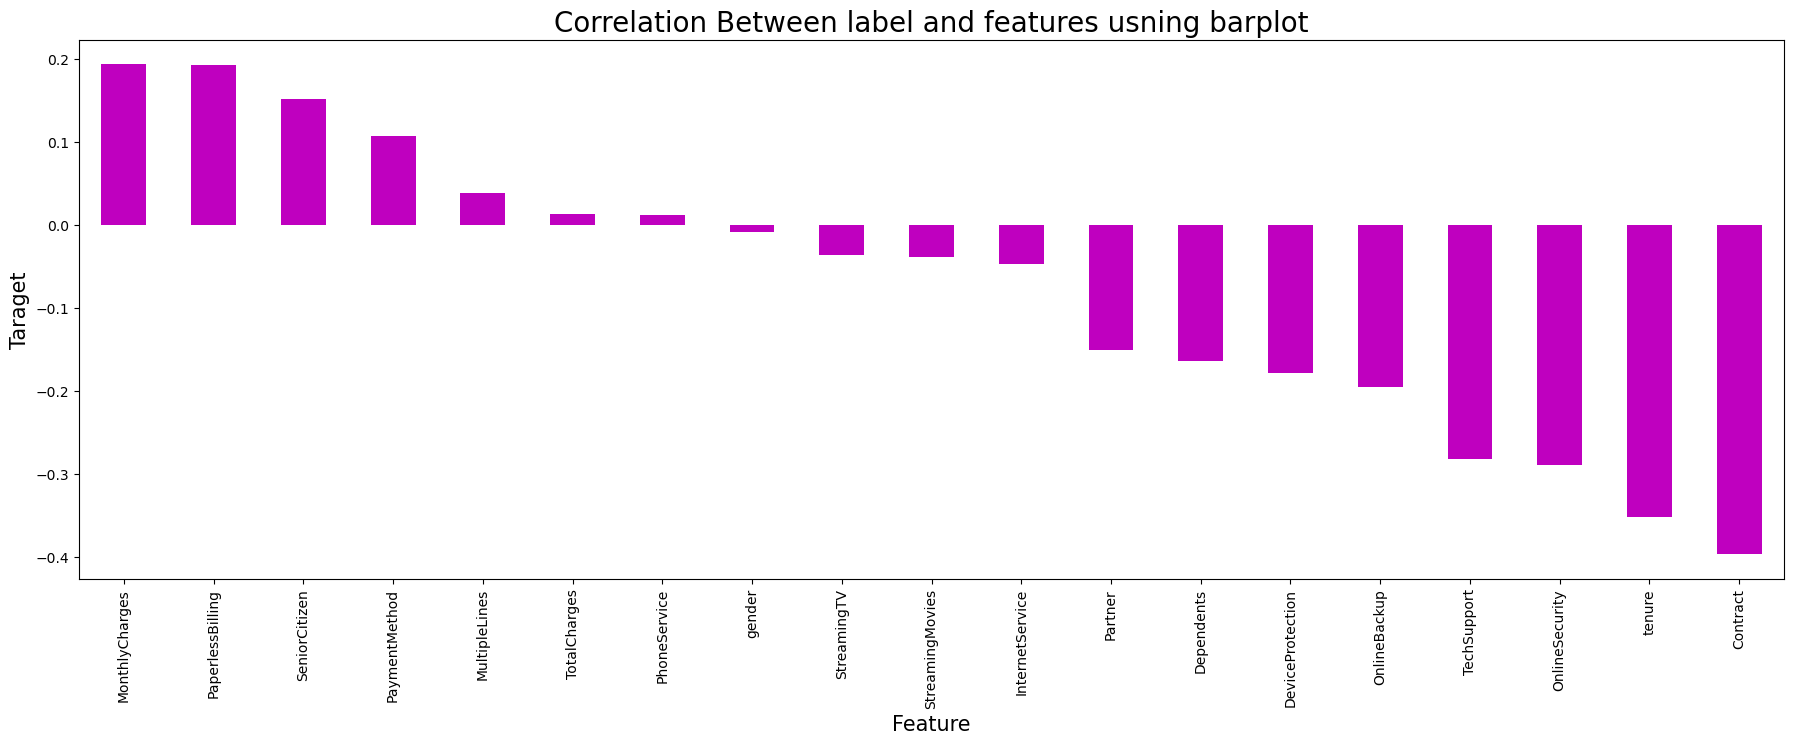

In [98]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Taraget', fontsize=15)
plt.title('Correlation Between label and features usning barplot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. here the feature the gender and PhoneService have very less correlation with the column.

# Separating Features and lable 

In [99]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [100]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [101]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     0.0              0      1.0         0.0       1           0.0   
1     1.0              0      0.0         0.0      34           1.0   
2     1.0              0      0.0         0.0       2           1.0   
3     1.0              0      0.0         0.0      45           0.0   
4     0.0              0      0.0         0.0       2           1.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0            1.0              0.0             0.0           2.0   
1            0.0              0.0             2.0           0.0   
2            0.0              0.0             2.0           2.0   
3            1.0              0.0             2.0           0.0   
4            0.0              1.0             0.0           0.0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0               0.0          0.0          0.0              0.0       0.0   
1               2.0          0.0          0.0              0.0       1.0   
2               0.0          0.0          0.0              0.0       0.0   
3               2.0          2.0          0.0              0.0       1.0   
4               0.0          0.0          0.0              0.0       0.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0               1.0            2.0           29.85     13.581130  
1               0.0            3.0           56.95     11.359991  
2               1.0            3.0           53.85      5.394691  
3               0.0            0.0           42.30     11.186889  
4               1.0            2.0           70.70      9.743476

# Feature Scaling using Standard Scalarization

In [102]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.340876      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.870241     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.155283      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.369379      0.327438   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0          0.062723        -1.183234       -0.918838      1.242550   
1         -0.991588        -1.183234        1.407321     -1.029919   
2         -0.991588        -1.183234        1.407321      1.242550   
3          0.062723        -1.183234        1.407321     -1.029919   
4         -0.991588         0.172250       -0.918838     -1.029919   
...             ...              ...             ...           ...   
7038       1.117034        -1.183234        1.407321     -1.029919   
7039       1.117034         0.172250       -0.918838      1.242550   
7040       0.062723        -1.183234        1.407321     -1.029919   
7041       1.117034         0.172250       -0.918838     -1.029919   
7042      -0.991588         0.172250        1.407321     -1.029919   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0            -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
1             1.245111    -0.925262    -1.113495        -1.121405  0.371271   
2            -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
3             1.245111     1.396299    -1.113495        -1.121405  0.371271   
4            -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
...                ...          ...          ...              ...       ...   
7038          1.245111     1.396299     1.146547         1.138411  0.371271   
7039          1.245111    -0.925262     1.146547         1.138411  0.371271   
7040         -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
7041         -1.027910    -0.925262    -1.113495        -1.121405 -0.828207   
7042          1.245111     1.396299     1.146547         1.138411  1.570749   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0             0.829798       0.398558       -1.160323     -0.115584  
1            -1.205113       1.334863       -0.259629     -0.726401  
2             0.829798       1.334863       -0.362660     -2.366871  
3            -1.205113      -1.474052       -0.746535     -0.774005  
4             0.829798       0.398558        0.197365     -1.170946  
...                ...            ...             ...           ...  
7038          0.829798       1.334863        0.665992     -0.635990  
7039          0.829798      -0.537747        1.277533      1.061409  
7040          0.829798       0.398558       -1.168632      0.113148  
7041          0.829798       1.334863        0.320338     -0.040087  
7042          0.829798      -1.474052        1.358961      0.976327  

[7043 rows x 19 columns]

We have scaled the data using Standard Scalarization method to overcome the issue of biasness.

# Checking Variance Inflation Factor(VIF)

In [103]:
# Finding Varience inflaction factor in each scaled column i.e, x.shape[1][1/(1-r2)]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values          Features
0     1.001690            gender
1     1.149725     SeniorCitizen
2     1.460862           Partner
3     1.382517        Dependents
4     2.756421            tenure
5     1.622301      PhoneService
6     1.392756     MultipleLines
7     1.826166   InternetService
8     1.248034    OnlineSecurity
9     1.186448      OnlineBackup
10    1.280451  DeviceProtection
11    1.303736       TechSupport
12    1.443677       StreamingTV
13    1.442628   StreamingMovies
14    2.462259          Contract
15    1.203650  PaperlessBilling
16    1.180925     PaymentMethod
17    2.816061    MonthlyCharges
18    1.108105      TotalCharges

 By checking VIF values we can find the features causing multicollineraity problem. Here we can find the feature TotalCharges and tenure VIF values greater then 10 which means they have high correlation with other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [104]:
# Droping TotalCharges column
x.drop('TotalCharges', axis=1, inplace=True)

In [105]:
# Again Checking VIF value to confirm whether the multicollinearty still exists or not 
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values          Features
0     1.001684            gender
1     1.149639     SeniorCitizen
2     1.460856           Partner
3     1.382106        Dependents
4     2.754468            tenure
5     1.622282      PhoneService
6     1.391652     MultipleLines
7     1.825876   InternetService
8     1.247696    OnlineSecurity
9     1.185932      OnlineBackup
10    1.280152  DeviceProtection
11    1.303573       TechSupport
12    1.443671       StreamingTV
13    1.442276   StreamingMovies
14    2.459201          Contract
15    1.202918  PaperlessBilling
16    1.180664     PaymentMethod
17    2.733024    MonthlyCharges

So, we have solved multicolinearity issue. we can now move ahead for model building.

In [106]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Here we can see that the data is not balanced, since it is a classification problem we will blance that data using oversampling method

# Oversampling Method


In [109]:
# Oversmpling the data
# !pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [110]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

In [111]:
y1.value_counts()

Churn
0.0    5174
1.0    5174
Name: count, dtype: int64

In [112]:
import threadpoolctl

now the data is balanced. Now we can build machine learning classification models.

# Modelling 

# Findint the Best random state

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    print("Best accurancy is ",maxAccu,"at random_state",maxRS)
    

Best accurancy is  0.8528180354267311 at random_state 1
Best accurancy is  0.8528180354267311 at random_state 1
Best accurancy is  0.8528180354267311 at random_state 1
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8582930756843801 at random_state 4
Best accurancy is  0.8602254428341385 at random_

The best accuracy is 86.53 % at random_state 102.

# Creating train test split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [115]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [116]:
# Checking accuracy for RandomForestClasifier
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.7813535257927118
[[1377  145]
 [ 317  274]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86      1522
         1.0       0.65      0.46      0.54       591

    accuracy                           0.78      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



The accuracy for this model is 86.50%

# Logistic Regression

In [117]:
# Checking accuracy for LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7983909133932797
[[1367  155]
 [ 271  320]]
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1522
         1.0       0.67      0.54      0.60       591

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score using LogisticRegresssion is 78.19 % 

# Suport Vector Machine Classifier

In [118]:
# Checking accuracy for Suport Vector Machine Classifier
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7879791765262659
[[1401  121]
 [ 327  264]]
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1522
         1.0       0.69      0.45      0.54       591

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113



The accuracy score using Suport Vector Machine Clssifier is 81.48% 

# Gradient Boosting Classifier

In [119]:
# Checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7960246095598675
[[1379  143]
 [ 288  303]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.86      1522
         1.0       0.68      0.51      0.58       591

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy_score using Gradient Boosting Classifier is 86.11% 

# AddBoost Classfier

In [120]:
# Checking accurcy for AdaBoost Classifer
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC =ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.807382867960246
[[1380  142]
 [ 265  326]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1522
         1.0       0.70      0.55      0.62       591

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



The accuracy_score using AdaBoostClassifier is 82.76% 

# Bagging Classifier

In [121]:
# Checking accuracy for BaggingClassifgier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7666824420255561
[[1368  154]
 [ 339  252]]
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85      1522
         1.0       0.62      0.43      0.51       591

    accuracy                           0.77      2113
   macro avg       0.71      0.66      0.68      2113
weighted avg       0.75      0.77      0.75      2113



The accuracy_score using BagginhgClassifier is 84.21% 

# ExtraTreesClassfier

In [122]:
# Checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test,predET))

0.7671557027922385
[[1358  164]
 [ 328  263]]
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1522
         1.0       0.62      0.45      0.52       591

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.75      0.77      0.75      2113



The accuracy_soure using Extra TreesClassifier is 87.43%

# Cross Validation Score

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
"""cv=5--- it's a fold value 1,2,3,4,5
   cross_val_score(modelname, features,targetvariable, cv=foldvalue, scoring='accuracy')
   
   in classification algorithms- default scoring parameter- accuracy
   for regression- deafulat scoring parameter is - r2 score
"""

"cv=5--- it's a fold value 1,2,3,4,5\n   cross_val_score(modelname, features,targetvariable, cv=foldvalue, scoring='accuracy')\n   \n   in classification algorithms- default scoring parameter- accuracy\n   for regression- deafulat scoring parameter is - r2 score\n"

https://scikit-learn.org/stable/modules/model_evaluation.html

In [125]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross validation score is ', accuracy_score(y_test,predRFC))

[0.77777778 0.78647343 0.89033816 0.89463509 0.90913485]
0.851671861829678
Difference between Accuracy score and cross validation score is  0.7813535257927118


# Logistic Regression

In [126]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and cress validation score is - ', accuracy_score(y_test,predLR)-score.mean())

[0.77149758 0.76183575 0.77101449 0.76752054 0.77960367]
0.770294408136676
Difference between Accuracy score and cress validation score is -  0.028096505256603677


# Gradient Boosting Classifier

In [127]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference Between Accuracy score and cross validation scoreis - ',accuracy_score(y_test,predGB)-score.mean())

[0.75458937 0.77922705 0.87246377 0.87916868 0.88351861]
0.8337934963563812
Difference Between Accuracy score and cross validation scoreis -  -0.03776888679651369


Extra Trees Classifier is our best model as the difference between accuracy score and cross validation score is least.

# Extra Trees Classifier is our best Model

# Hyper Parameter Tuning

In [128]:
# ExtraTress Classifier
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]           }

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [129]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [130]:
# GCV.fit(x_train,y_train)

In [131]:
# GCV.best_params_

# Plotting ROC and compare AUC for all the models used

In [133]:
# Plotting for all the models used here 
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

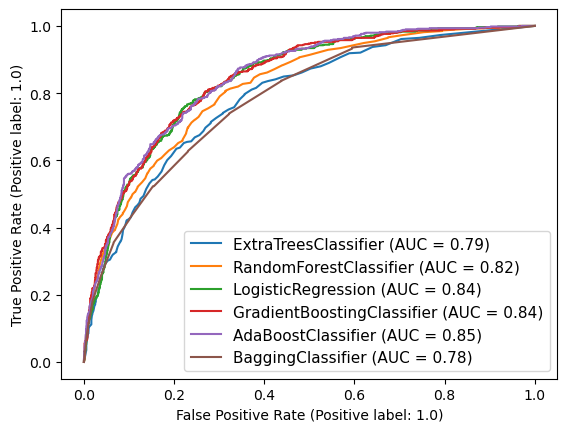

In [134]:
disp=plot_roc_curve(ET,x_test,y_test) # ax_=Axes with confusion matrix
plot_roc_curve(RFC,x_test,y_test, ax=disp.ax_)
plot_roc_curve(LR,x_test,y_test, ax=disp.ax_)
plot_roc_curve(GB,x_test,y_test, ax=disp.ax_)
plot_roc_curve(ABC,x_test,y_test, ax=disp.ax_)
plot_roc_curve(BC,x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

Here we can see area under curve for each model used.

# Plotting ROC and compare AUC for the best model

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 94%

https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_roc_curve.html

### Thanks 
* Navin Singh
* 23 Oct 2025